In [1]:
from __future__ import print_function
import morphs

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import itertools

from morphs.data.derivative import f_poly, f_map

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dd = morphs.load.derivative_dict()
ddf = morphs.load.derivative_df()

In [3]:
def _derivative_plot(orders=range(7), normalize=True, **kwargs):
    x = np.linspace(1, 128)
    data = kwargs.pop("data")
    morph_dim = data["morph_dim"].values[0]
    #     cmap = sns.cubehelix_palette(7, start=2.5, rot=1, dark=0.1, light=0.5)
    #     cmap = sns.color_palette("GnBu_d", 7)[::-1]
    cmap = sns.color_palette("husl", 7)
    ax = plt.gca()
    y_hat = {}
    for order in orders:
        ys = data[order][data[order].str[0].notna()].map(f_map)
        for y in ys:
            ax.plot(x, y, alpha=0.2 / len(orders), color=cmap[order])
        y_hat[order] = ys.mean()
    for order in orders:
        ax.plot(x, y_hat[order], color=cmap[order])
    morphs.plot.boundary(ax, morph_dim)


def derivative_plot(ddf, row_order="abcdef", col_order="cdefgh", **kwargs):
    g = morphs.plot.morph_grid(
        ddf,
        _derivative_plot,
        "$\partial N / \partial s$",
        row_order=row_order,
        col_order=col_order,
        sharex=False,
        sub_title="",
        **kwargs
    )
    g = g.set(ylim=(0, 0.05), xlim=(1, 128))
    g.despine(top=True, right=True, left=False, bottom=False)
    morph_dims = ddf["morph_dim"].unique()
    morphs.plot.format_morph_dim_label(g, row_order, col_order, morph_dims)
    return g

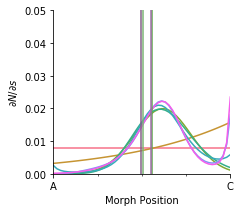

In [4]:
for selected_block_path in ddf["block_path"].unique():
    if (
        "Pen01_Lft_AP2500_ML500__Site06_Z3000__B1183_cat_P01_S06_5"
        in selected_block_path
    ):
        break
g = derivative_plot(
    ddf[ddf["block_path"] == selected_block_path],
    row_order=["a"],
    col_order=["c"],
    aspect=1.1,
)
morphs.plot.savefig(g, "thielk-block-ac")

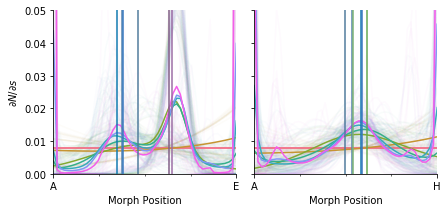

In [5]:
g = derivative_plot(ddf, row_order=["a"], col_order=["e", "h"])

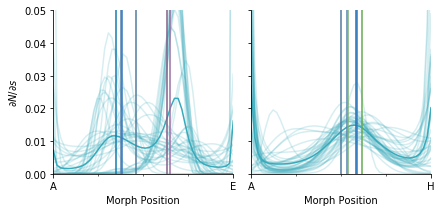

In [6]:
g = derivative_plot(ddf, row_order=["a"], col_order=["e", "h"], map_kwargs={"orders": [4]})
morphs.plot.savefig(g, "thielk-all-ae-ah")

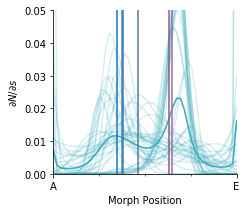

In [7]:
g = derivative_plot(ddf, row_order=["a"], col_order=["e"], map_kwargs={"orders": [4]}, aspect=1.1)
morphs.plot.savefig(g, "thielk-all-ae")

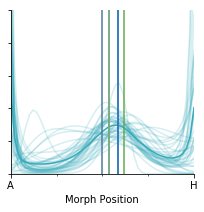

In [8]:
g = derivative_plot(ddf, row_order=["a"], col_order=["h"], map_kwargs={"orders": [4]}, aspect=1.1)
ax = g.axes[0,0]
ax.set_yticklabels([])
ax.set_ylabel("")
morphs.plot.savefig(g, "thielk-all-ah")

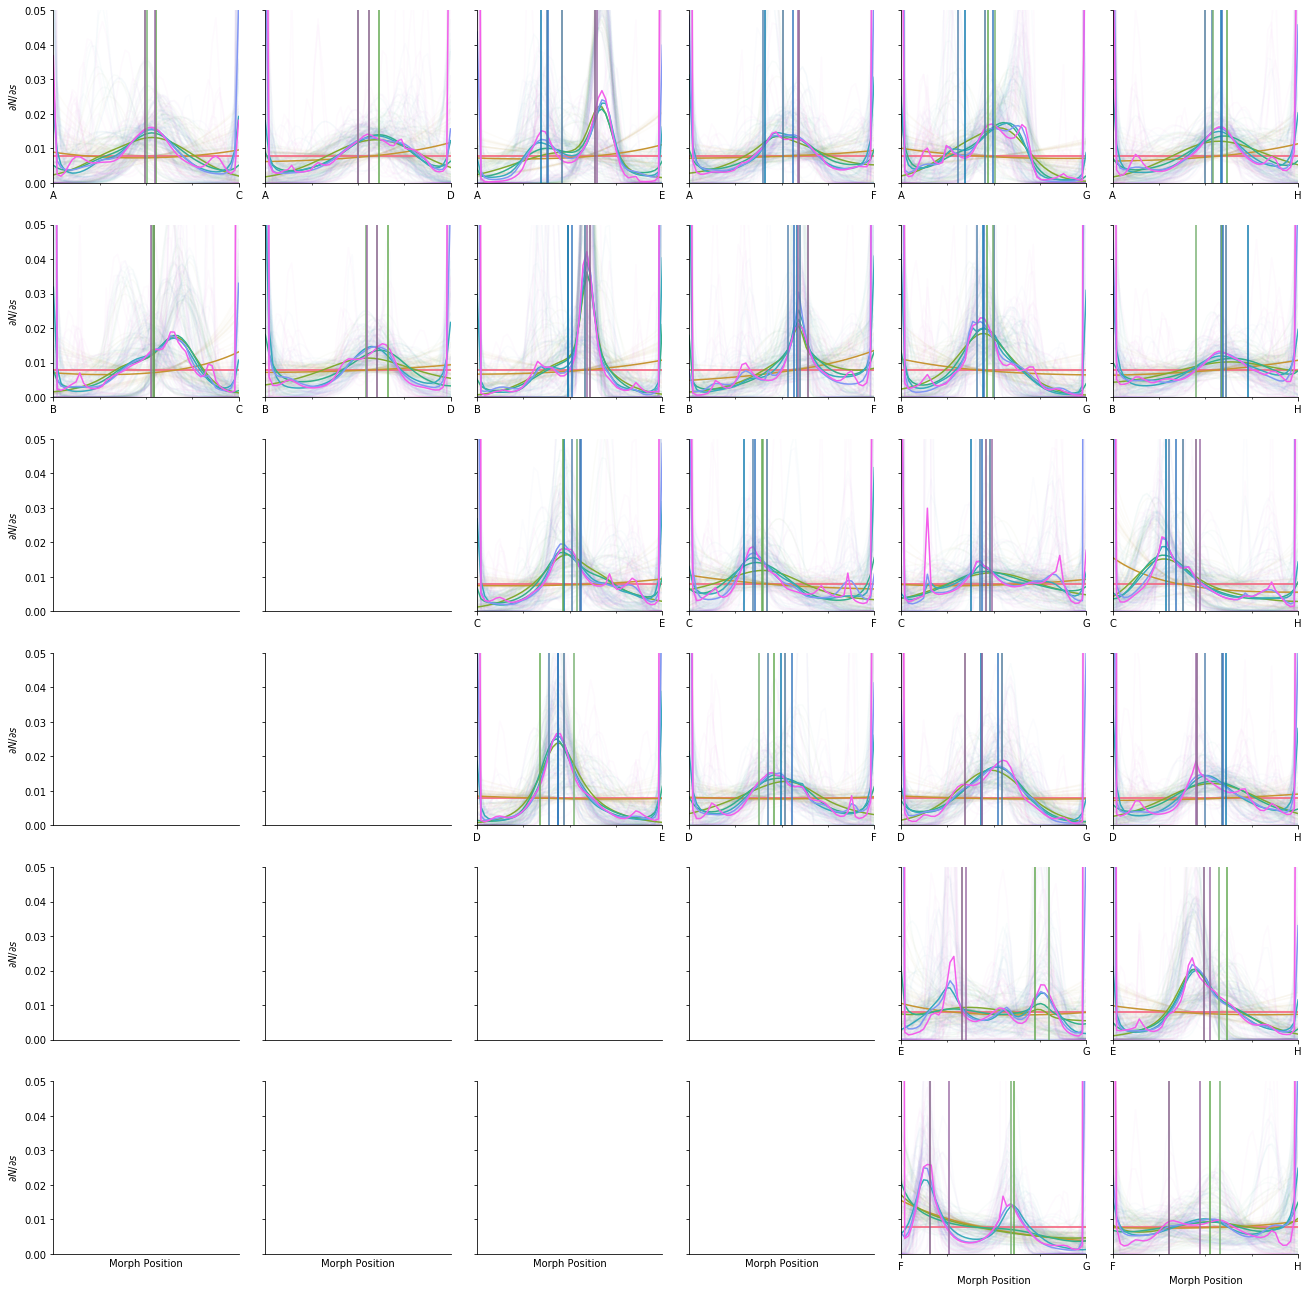

In [9]:
g = derivative_plot(ddf)